# **What role does urbanization, using China as an example, play in shaping average temperature trends in a warming world?**

## Introduction

With the development of modern cities and urbanization, the global average temperature has been increasing over the past century, leading to concerns about the impacts of climate change. While urbanization signifantly improves life standards and society effienicy, it is commonly believed to be a significant contributor to the global warming process. China, one of the fastest-growing developing countries in the world, is undergoing rapid urbanization in the recent few decades. This research aims to examine the role of urbanization in shaping average temperature trends in China. The analysis will be foused on finding the relationship between average temperature and other independent variables such as city, longitude, latitude, and seasons based on a time series analysis starting from 1950 to 2013. Specificly, 1979 to 2013 is the period China decided to begin the journey of reforming and opening-up. By investigating the impact of urbanization on temperature trends in China, this study will further enhance our understanding of the interaction between human acitivity and the enviroment.

## Data Cleaning

In [153]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/Users/booker/Desktop/ECO225Project/Data/GlobalLandTemperaturesByCity.csv')

In [155]:
# Check missing values
print(df.isnull().sum())

# Replacing missing values (not dropping since we will calculate the temperature change in the later section)
df['AverageTemperature'].interpolate(method='linear', inplace=True)

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


In [157]:
# Convert all dates
df['Date'] = pd.to_datetime(df.dt)
df.drop(columns = ['dt'], axis = 1, inplace = True)
df['Year'] = df['Date'].dt.year

In [159]:
# Group by China and year to get national average temperature
df_china = df[df['Country'] == 'China']
grouped_na = df_china.groupby('Year').mean().reset_index()

# Filter the data to form 3 datasets ranging from different years
grouped_na_1 = grouped_na[(grouped_na['Year'] >= 1950) & (grouped_na['Year'] <= 1978)]
grouped_na_2 = grouped_na[(grouped_na['Year'] >= 1979) & (grouped_na['Year'] <= 2013)]
grouped_na_3 = grouped_na[(grouped_na['Year'] >= 1950) & (grouped_na['Year'] <= 2013)]

In [207]:
# Select data from 1950 to 2013
grouped_time = df_china[(df_china['Year'] >= 1950) & (df_china['Year'] <= 2013)]

# Group by City and Year to find the annual average temperature for each city
grouped_citi = grouped_time.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()

grouped_citi.set_index(['City', 'Year'], inplace=True)


for row in grouped_citi.iterrows():
    index_value, columns_values = row
    
    cleaneddata = float(grouped_citi.loc[index_value[0], 2012]["AverageTemperature"] - grouped_citi.loc[index_value[0], 1950]["AverageTemperature"])
    
    grouped_citi.at[index_value, "2012-1950"] = cleaneddata
    

In [208]:
grouped_citi

AverageTemperature  2012-1950
City   Year                               
Acheng 1950            2.278167   0.244083
       1951            2.380917   0.244083
       1952            1.605833   0.244083
       1953            1.878250   0.244083
       1954            1.833333   0.244083
...                         ...        ...
Ürümqi 2009            7.287417   1.074833
       2010            6.650083   1.074833
       2011            6.806083   1.074833
       2012            6.600167   1.074833
       2013           10.294722   1.074833

[23744 rows x 2 columns]

In [107]:
grouped_citi['TemperatureDifference'] = grouped_citi[grouped_citi['Year'] == 2013]['AverageTemperature'] - grouped_citi[grouped_citi['Year'] == 1950]['AverageTemperature']

In [206]:
grouped_citi.at['Acheng', 2012]["2012-1950"]

KeyError: 2012

In [205]:
x = df_china.set_index('Country')
x = list(set(x.loc['China']["City"]))
x

['Hohhot',
 'Neijiang',
 'Wuhu',
 'Baiyin',
 'Qiqihar',
 'Hengshui',
 'Luohe',
 'Hulan Ergi',
 'Liusha',
 'Tieling',
 'Tengzhou',
 'Nehe',
 'Shenyang',
 'Honghu',
 'Longjiang',
 'Zhumadian',
 'Yichun',
 'Didao',
 'Luzhou',
 'Qinzhou',
 'Guangzhou',
 'Chenzhou',
 'Jishou',
 'Hailar',
 'Yanji',
 'Gaozhou',
 'Huangpu',
 'Taizhou',
 'Tongchuan',
 'Yinchuan',
 'Wenzhou',
 'Shishou',
 'Xinyang',
 'Chengde',
 'Wuxi',
 'Fushun',
 'Maanshan',
 'Laiwu',
 'Huangyan',
 'Hebi',
 'Guangshui',
 'Sanbu',
 'Zaoyang',
 'Xingyi',
 'Haimen',
 'Huadian',
 'Pulandian',
 'Anyang',
 'Chuzhou',
 'Pingliang',
 'Dunhua',
 'Weinan',
 'Huangzhou',
 'Baoshan',
 'Liaoyang',
 'Rizhao',
 'Sanmenxia',
 'Xingtai',
 'Xiangdong',
 'Anbu',
 'Wanxian',
 'Qianguo',
 'Shiyan',
 'Linhai',
 'Yichang',
 'Wuhan',
 'Datong',
 'Zaozhuang',
 'Nanjing',
 'Wuwei',
 'Zhuzhou',
 'Nanpiao',
 'Fuzhou',
 'Dongli',
 'Zhuhai',
 'Tongling',
 'Puqi',
 'Shilong',
 'Pingdingshan',
 'Yizheng',
 'Qujing',
 'Peking',
 'Guilin',
 'Chenghai',
 'Shang

## Summary Statistics Tables

In [11]:
# Describing X and Y variables 
gb_year[['AverageTemperature', 'AverageTemperatureUncertainty', 'Year', 'Month']].describe()

,AverageTemperature,AverageTemperatureUncertainty,Year,Month
count,267.000000,267.000000,267.000000,267.000000
mean,15.340967,1.575500,1879.955056,6.498227
std,3.360706,1.335002,77.298695,0.412133
min,1.497593,0.323927,1743.000000,2.500000
25%,14.512396,0.445444,1813.500000,6.500000
50%,17.032359,1.078305,1880.000000,6.500000
75%,17.699692,2.380854,1946.500000,6.501925
max,19.061038,5.470221,2013.000000,11.000000


## Plots, Histograms, Figures

### Line Plots

In this section, we will first use line plots to demonstrate how average temperature change over the period of 1950 to 2013 nationally. 

Specifcially, we will divide the time interval into two periods: 1950 to 1978 and 1979 to 2013. The first time period is the founding of the People's Republic of China, whereas the second period is the China decided to begin the journey of reforming and opening-up. The second period of time represents the urbanization and fast economic development of China.  

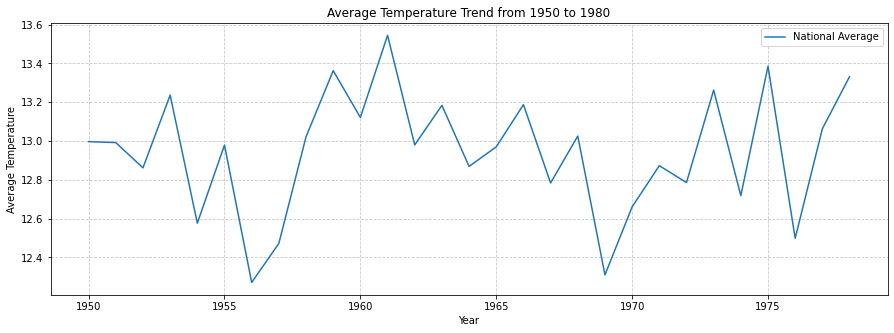

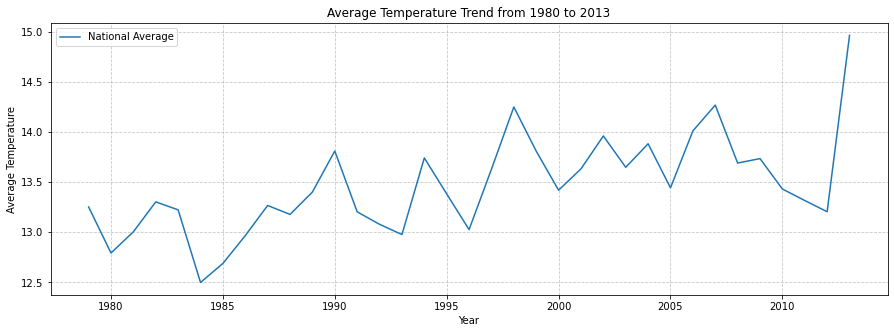

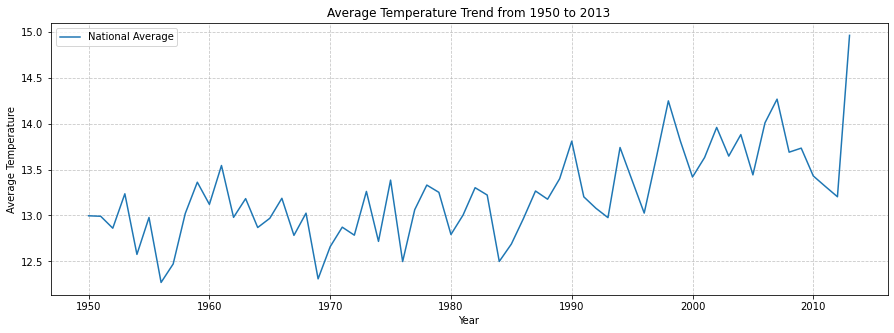

In [99]:
# Write function that can generate line plots
def plot_lineplot(dataset, title):
    plt.figure(figsize=(15, 5))
    plt.plot(dataset['Year'], dataset['AverageTemperature'], label='National Average')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature')
    plt.title(title)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()
    
# Plot the graphs
plot_lineplot(grouped_na_1, 'Average Temperature Trend from 1950 to 1980')
plot_lineplot(grouped_na_2, 'Average Temperature Trend from 1980 to 2013')
plot_lineplot(grouped_na_3, 'Average Temperature Trend from 1950 to 2013')

## Conclusion